<a href="https://colab.research.google.com/github/Diya1s/Diya1s/blob/main/pract%2Bbonus6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV # Import GridSearchCV here
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('drug200.csv')
print("Original Dataset:\n")
print(data.head())

# Preprocessing: Convert categorical features to numerical using one-hot encoding
# 1. Identify categorical features
categorical_features = ['Sex', 'BP', 'Cholesterol']

# 2. Create dummy variables using pandas get_dummies()
encoded_data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# 3. The 'Drug' column is also categorical and needs to be encoded.
drug_mapping = {drug: i for i, drug in enumerate(encoded_data['Drug'].unique())}
encoded_data['Drug'] = encoded_data['Drug'].map(drug_mapping)

# Print the updated (preprocessed) dataset
print("\n\nUpdated (Preprocessed) Dataset:\n")
print(encoded_data.head())

# Assume 'Drug' is the target variable
X = encoded_data.drop('Drug', axis=1)
y = encoded_data['Drug']




# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Original Dataset:

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


Updated (Preprocessed) Dataset:

   Age  Na_to_K  Drug  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0   23   25.355     0  False   False      False               False
1   47   13.093     1   True    True      False               False
2   47   10.114     1   True    True      False               False
3   28    7.798     2  False   False       True               False
4   61   18.043     0  False    True      False               False


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[15  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  3]]


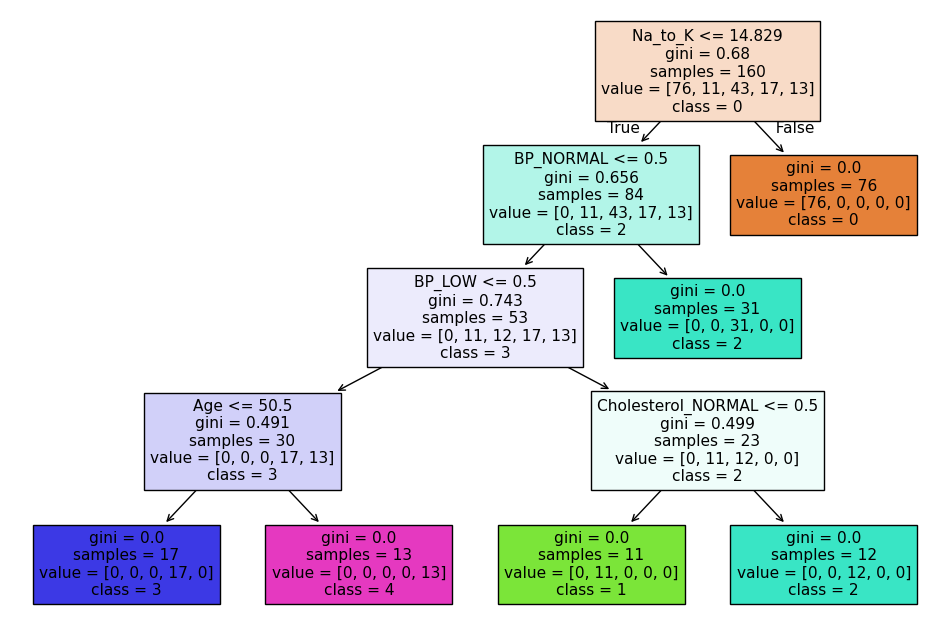

In [ ]:
# Create a Decision Tree Classifier with Gini impurity as the criterion
# By default, the DecisionTreeClassifier uses 'gini' but we specify it explicitly
clf = DecisionTreeClassifier(criterion='gini')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree (Optional)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=encoded_data['Drug'].unique().astype(str), filled=True)
plt.show()

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  
Missing values:
 Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phen

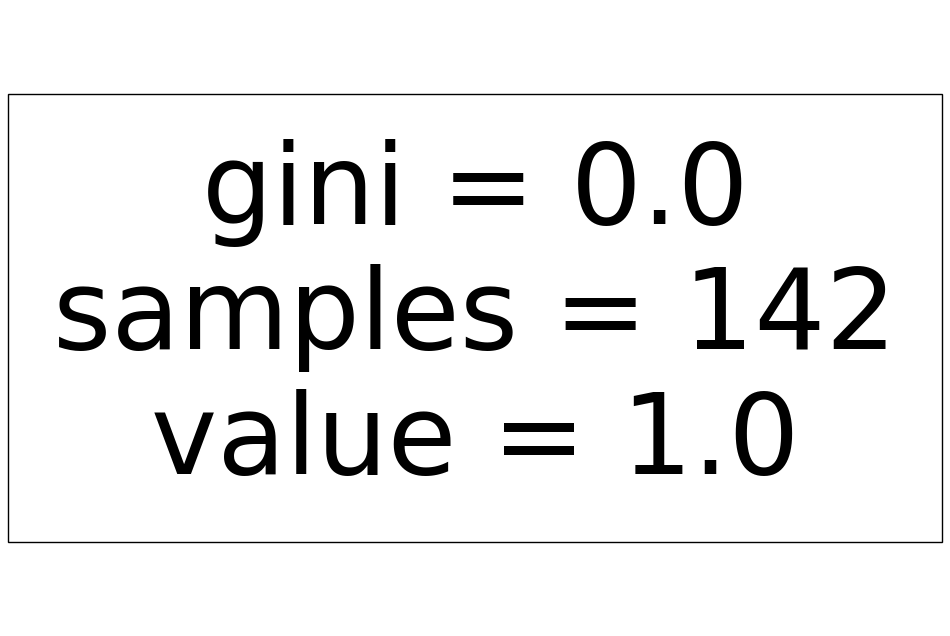

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validatio

Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
   


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Model Performance:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
   

In [ ]:
#bonus 6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
data = pd.read_csv('wine_quality.csv')
print(data.head())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Define features and target
X = data.drop(columns=["Wine"]) # Change df to data
y = data["Wine"]

# Convert quality into binary classification (good wine: 1, bad wine: 0)
y = (y >= 6).astype(int)

print("\nClass distribution:")
print(y.value_counts())

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nShapes of training and testing sets:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Bad", "Good"], filled=True)
plt.show()

# Predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and performance
best_clf = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Evaluate tuned model
y_pred_best = best_clf.predict(X_test_scaled)
print("\nTuned Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
